In [2]:
##### Loda prepared data
Log2.Cor.Res.list <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_scColon/Log2.Cor.Res.list.dataset.rds")

In [3]:
#### Unpack the dataset
Cor.Res.CV1000 <- Log2.Cor.Res.list$Cor.Res.CV1000
Cor.Res.CV1500 <- Log2.Cor.Res.list$Cor.Res.CV1500
Cor.Res.CV2000 <- Log2.Cor.Res.list$Cor.Res.CV2000
Cor.Res.CV4000 <- Log2.Cor.Res.list$Cor.Res.CV4000
Cor.Res.CV8000 <- Log2.Cor.Res.list$Cor.Res.CV8000
Pheno.merged <- Log2.Cor.Res.list$Pheno.merged

In [4]:
#### Raw Correlation value transformed into correlation percent for each cell
########## Normalization using Z-score
Normal.Z.1000<- base::apply(Cor.Res.CV1000$Cor.merged, 2, function(x){
  (x-mean(x))/sd(x)
})
Normal.Z.1500<- base::apply(Cor.Res.CV1500$Cor.merged, 2, function(x){
  (x-mean(x))/sd(x)
})
Normal.Z.2000<- base::apply(Cor.Res.CV2000$Cor.merged, 2, function(x){
  (x-mean(x))/sd(x)
})
Normal.Z.4000<- base::apply(Cor.Res.CV4000$Cor.merged, 2, function(x){
  (x-mean(x))/sd(x)
})
Normal.Z.8000<- base::apply(Cor.Res.CV8000$Cor.merged, 2, function(x){
  (x-mean(x))/sd(x)
})

In [5]:
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/ClustHeatmap.R")
ClustHeatmap( Normal.Z.1000, Pheno.merged= Pheno.merged, title = "Cor.Res.CV1000",scale = c("column"))

Loading required package: flashClust

Attaching package: ‘flashClust’

The following object is masked from ‘package:stats’:

    hclust

Loading required package: WGCNA
Loading required package: dynamicTreeCut
Loading required package: fastcluster

Attaching package: ‘fastcluster’

The following object is masked from ‘package:flashClust’:

    hclust

The following object is masked from ‘package:stats’:

    hclust



Attaching package: ‘WGCNA’

The following object is masked from ‘package:stats’:

    cor



ERROR: Error in hclust(d, method, members): NA/NaN/Inf in foreign function call (arg 11)


In [11]:
Normal.Z.1500[is.na(Normal.Z.1500)] <- 0
ClustHeatmap( Normal.Z.1500, Pheno.merged= Pheno.merged, title = "Cor.Res.CV1500")

ERROR: Error in hclust(d, method, members): NA/NaN/Inf in foreign function call (arg 11)


In [13]:
table(is.na(Normal.Z.1500))


FALSE 
92340 

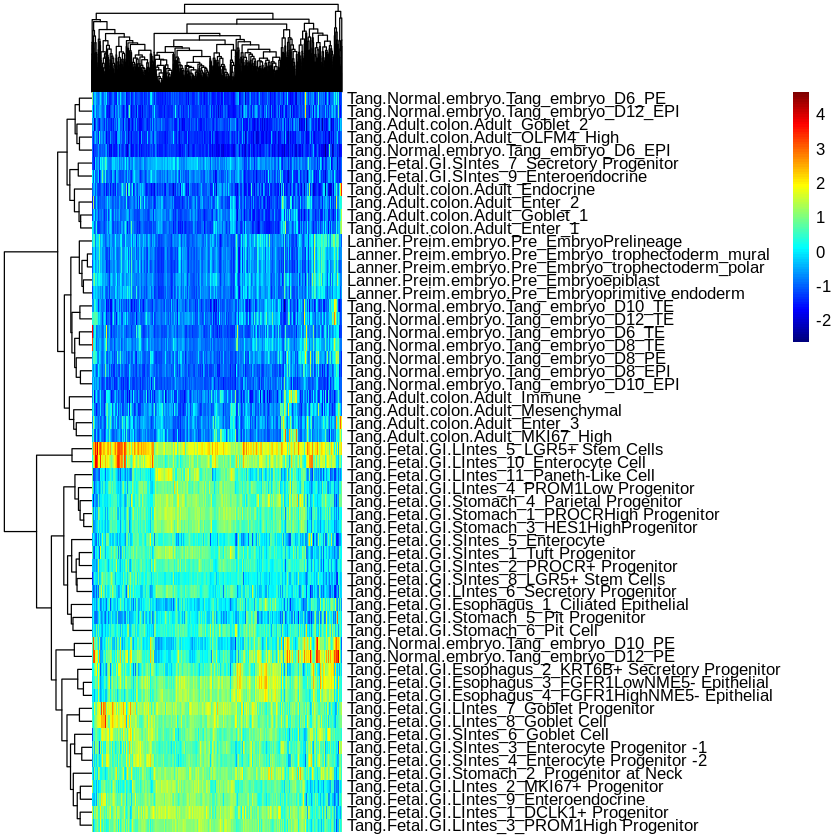

In [14]:
require(pheatmap)
 color_scheme = colorRampPalette(c("#00007F", "blue", "#007FFF", "cyan",
                                    "#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"))(100);
pheatmap(Normal.Z.2000,color = color_scheme, show_colnames = F, scale = "none")

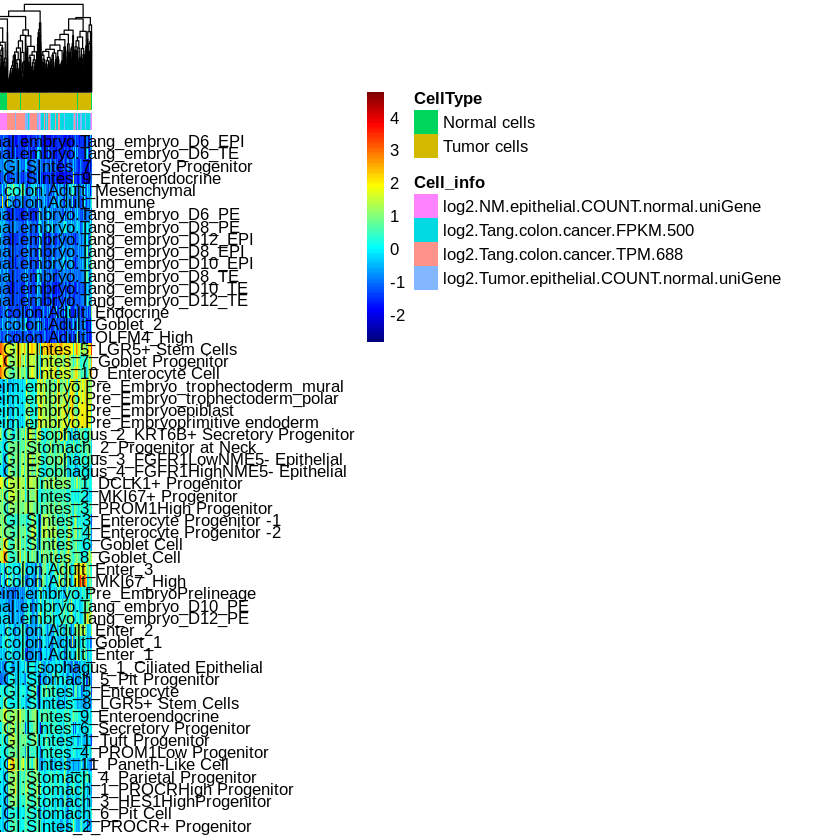

In [15]:
pheatmap(Normal.Z.4000,color = color_scheme,show_colnames = F, annotation_col = Pheno.merged[,-1])